In [55]:
import numpy as np
from numba import jit
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Exercise 1

We seek to solve for $A$ in the policy function solution for the Brock \& Mirman model, which takes the following form: $K_{t+1} = Ae^{z_t}K^{\alpha}_t$. We are also given that the following holds in the steady state: $\overline{K} = A^{\frac{1}{1 - \alpha}}$. From this, we glean that $A = \overline{K}^{1 - \alpha}$. Further, we can use iterative guesses for $A$ in the Euler equation to determine that A = $\alpha \cdot \beta$. We show this using the following:
\begin{equation}
\begin{split}
\overline{K} =& \ Ae^{z_t}\overline{K}^{\alpha} \\
A^{\frac{1}{1-\alpha}} =& \ Ae^{z_t}(A^{\frac{1}{1-\alpha}})^{\alpha} \\
A^{\frac{1}{1-\alpha}} =& \ Ae^{z_t}(A^{\frac{\alpha}{1-\alpha}}) \\
A =& \frac{A^{\frac{1}{1-\alpha}}}{e^{z_t}(A^{\frac{\alpha}{1-\alpha}})} \\
A =& \ e^{z_t}A \\ 
\alpha \cdot \beta =& \ \alpha \cdot \beta \\ 
\end{split}
\end{equation}
As in the steady state we observe that $\overline{z} = 0, \ e^{\overline{z}} = 1$, so this condition is satisfied.

## Exercise 2

We have the following functional forms for a sample model:
\begin{equation}
\begin{split}
u(c_t,l_t) =& \ ln(c_t) + a \cdot ln(1-l_t) \\
F(K_t,L_t,z_t) =& \ e^{z_t}K_t^{\alpha}L_t^{1-\alpha}
\end{split}
\end{equation}
These can be plugged into the characterizing equations as follows:
\begin{equation}
\begin{split}
c_t =& \ (1-\tau)\big[ w_tl_t+(r_t-\delta)k_t \big]+k_t+T_t-k_{t+1} \\
\frac{1}{c_t} =& \ \beta E_t \bigg[ \frac{1}{c_{t+1}} [(r_{t+1}-\delta)(1-\tau)+1] \bigg] \\
\frac{a}{1-l_t} =& \ \frac{w_t(1-\tau)}{c} \\
r_t =& \ \alpha e^{z_t}k_t^{\alpha -1}l_t^{1-\alpha} \\
w_t =& \ (1-\alpha) e^{z_t}k_t^{\alpha}l_t^{\alpha} \\
\tau[w_tl_t + (r_t-\delta)k_t] =& \ T_t \\
z_t =& \ (1-\rho_z)\overline{z} + \rho_zz_{t-1}+\epsilon_t^z
\end{split}
\end{equation}
It would not be possible to use the same tricks to obtain the policy function as in the Brock and Mirman model, as we do not have a general-case solution for the steady-state capital $\overline{K}$.

## Exercise 3

We have the following functional forms for a sample model:
\begin{equation}
\begin{split}
u(c_t,l_t) =& \ \frac{c_t^{1-\gamma} - 1}{1 - \gamma} + a \cdot ln(1-l_t) \\
F(K_t,L_t,z_t) =& \ e^{z_t}K_t^{\alpha}L_t^{1-\alpha}
\end{split}
\end{equation}
These can be plugged into the characterizing equations as follows:
\begin{equation}
\begin{split}
c_t =& \ (1-\tau)\big[ w_tl_t+(r_t-\delta)k_t \big]+k_t+T_t-k_{t+1} \\
\frac{1}{c_t^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{c^{\gamma}_{t+1}} [(r_{t+1}-\delta)(1-\tau)+1] \bigg] \\
\frac{a}{1-l_t} =& \ \frac{w_t(1-\tau)}{c^{\gamma}} \\
r_t =& \ \alpha e^{z_t}k_t^{\alpha -1}l_t^{1-\alpha} \\
w_t =& \ (1-\alpha) e^{z_t}k_t^{\alpha}l_t^{\alpha} \\
\tau[w_tl_t + (r_t-\delta)k_t] =& \ T_t \\
z_t =& \ (1-\rho_z)\overline{z} + \rho_zz_{t-1}+\epsilon_t^z
\end{split}
\end{equation}

## Exercise 4

We have the following functional forms for a sample model:
\begin{equation}
\begin{split}
u(c_t,l_t) =& \ \frac{c_t^{1-\gamma} - 1}{1 - \gamma} + a \cdot \frac{(1-l_t)^{1-\zeta} -1}{1-\zeta} \\
F(K_t,L_t,z_t) =& \ e^{z_t}\big[ \alpha K_t^{\eta} + (1-\alpha)L_t^{\eta} \big]^{\frac{1}{\eta}}
\end{split}
\end{equation}
These can be plugged into the characterizing equations as follows:
\begin{equation}
\begin{split}
c_t =& \ (1-\tau)\big[ w_tl_t+(r_t-\delta)k_t \big]+k_t+T_t-k_{t+1} \\
\frac{1}{c_t^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{c^{\gamma}_{t+1}} [(r_{t+1}-\delta)(1-\tau)+1] \bigg] \\
\frac{a}{(1-l_t)^{\zeta}} =& \ \frac{w_t(1-\tau)}{c^{\gamma}} \\
r_t =& \ \alpha e^{z_t}k^{\eta-1}[(1-\alpha)l^{\eta} + \alpha k^{\eta}]^{\frac{1}{\eta}-1}  \\
w_t =& \ (1-\alpha) e^{z_t}l^{\eta-1}[(1-\alpha)l^{\eta} + \alpha k^{\eta}]^{\frac{1}{\eta}-1} \\
\tau[w_tl_t + (r_t-\delta)k_t] =& \ T_t \\
z_t =& \ (1-\rho_z)\overline{z} + \rho_zz_{t-1}+\epsilon_t^z
\end{split}
\end{equation}

## Exercise 5

We have the following functional forms for a sample model:
\begin{equation}
\begin{split}
u(c_t,l_t) =& \ \frac{c_t^{1-\gamma} - 1}{1 - \gamma} \\
F(K_t,L_t,z_t) =& \ K_t^{\alpha}(L_te^{z_t})^{1-\alpha}
\end{split}
\end{equation}
These can be plugged into the characterizing equations as follows:
\begin{equation}
\begin{split}
c_t =& \ (1-\tau)\big[ w_t+(r_t-\delta)k_t \big]+k_t+T_t-k_{t+1} \\
\frac{1}{c_t^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{c^{\gamma}_{t+1}} [(r_{t+1}-\delta)(1-\tau)+1] \bigg] \\
0 =& \ \frac{w_t(1-\tau)}{c^{\gamma}} \\
r_t =& \ \alpha l_t^{1−\alpha} e^{(1−a)z_t}k_t^{a−1} = \alpha e^{(1−a)z_t}k_t^{a−1} \\
w_t =& \ \frac{(1 - \alpha)k^{\alpha}e^{(1-\alpha)z_t}}{l_t^{\alpha}} = (1 - \alpha)k^{\alpha}e^{(1-\alpha)z_t}\\
\tau[w_t + (r_t-\delta)k_t] =& \ T_t \\
z_t =& \ (1-\rho_z)\overline{z} + \rho_zz_{t-1}+\epsilon_t^z
\end{split}
\end{equation}
We then have for the steady-state equations:
\begin{equation}
\begin{split}
\overline{c} =& \ (1-\tau)\big[ \overline{w}+(\overline{r}-\delta)\overline{k} \big] + \overline{T}\\
\frac{1}{\overline{c}^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{\overline{c}^{\gamma}} [(\overline{r}-\delta)(1-\tau)+1] \bigg] \\
\overline{r} =& \ \alpha e^{(1−a)\overline{z}}\overline{k}^{a−1} \\
\overline{w} =& \ (1 - \alpha)\overline{k}^{\alpha}e^{(1-\alpha)\overline{z}}\\
\tau[\overline{w} + (\overline{r}-\delta)\overline{k}] =& \ \overline{T} \\
\end{split}
\end{equation}
We then have:
\begin{equation}
\begin{split}
\frac{1}{\overline{c}^{\gamma}} =& \ \beta E\left( \frac{(\overline{r}-\delta)(1-\tau)+1}{ \overline{c} ^{\gamma}} \right) \\
=& \ \frac{\beta [(\overline{r}-\delta)(1-\tau)+1]}{ \overline{c} ^{\gamma}} \\
1 =& \ \beta [(\overline{r}-\delta)(1-\tau)+1] \\
1 =& \ \beta [(\alpha e^{(1−\alpha)\overline{z}}\overline{k}^{\alpha−1}-\delta)(1-\tau)+1] \\
1 =& \ \beta(\alpha e^{(1−\alpha)\overline{z}}\overline{k}^{\alpha−1}-\delta)(1-\tau) + \beta \\
1 -\beta =& \ \beta(\alpha e^{(1−\alpha)\overline{z}}\overline{k}^{\alpha−1}-\delta)(1-\tau)\\
\frac{1 -\beta}{\beta (1-\tau)}  =& \ \alpha e^{(1−\alpha)\overline{z}}\overline{k}^{\alpha−1}-\delta \\
\frac{1 -\beta}{\beta (1-\tau)} + \delta =& \ \alpha e^{(1−\alpha)\overline{z}}\overline{k}^{a−1} \\
\frac{\frac{1 -\beta}{\beta (1-\tau)} + \delta}{\alpha e^{(1−\alpha)\overline{z}}} =& \ \overline{k}^{\alpha−1} \\ 
\overline{k} =& \ \left( \frac{\frac{1 -\beta}{\beta (1-\tau)} + \delta}{\alpha e^{(1−\alpha)\overline{z}}} \right)^{\frac{1}{\alpha - 1}} \\
\end{split}
\end{equation}
From this result, and using the hypothesized parameter values, we have that $\overline{k} = 7.287$.

In [4]:
gamma = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.10
tau = 0.05
z = 0

result = ((((1-beta)/(beta*(1-tau))) + delta)/(alpha*np.exp(z))) ** (1/(alpha-1))
print("Analytical Solution:",result)

Analytical Solution: 7.28749795069


We now attempt to solve for the same solution using iterative methods (VFI):

In [20]:
paramss = (gamma,zeta,beta,alpha,a,delta,tau)

def rate(k,l,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return alpha*(l**(1-alpha))*(k**(alpha-1))

def wage(k,l,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return (1-alpha)*(l**(-alpha))*(k**(alpha))

def consumption(k,l,w,r,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return w*l + (r-delta)*k

def prob5_error(V, *params):
    params = gamma,zeta,beta,alpha,a,delta,tau
    k,l = V[0],1
    r = rate(k,l,params)
    w = wage(k,l,params)
    c = consumption(k,l,w,r,params)
    error = abs((1/(c**gamma)) - beta*((1/(c**gamma))*((r-delta)*(1-tau)+1)))
    return error

def transfer(k,l,w,r,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return tau*(w + (r-delta)*k)

def investment(k,l,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return delta*k

def outputs(k,l,params):
    gamma,zeta,beta,alpha,a,delta,tau = params
    return (k**alpha)*(l**(1-alpha))

result_prob5 = opt.minimize(prob5_error,np.array([1,1]),args=(paramss))
print("Iterative Solution (k,l):",result_prob5.x)

Iterative Solution (k,l): [ 7.28749795  1.        ]


We now can solve for all steady-state values:

In [24]:
kbar,lbar = result_prob5.x[0],result_prob5.x[1]
rbar,wbar = rate(kbar,lbar,paramss),wage(kbar,lbar,paramss)

print("Steady-State Capital           :", kbar)
print("Steady-State Labor             :", lbar)
print("Steady-State Interest Rate     :", rbar)
print("Steady-State Wage              :", wbar)
print("Steady-State Consumption       :", consumption(kbar,lbar,wbar,rbar,paramss))
print("Steady-State Transfer Payments :", transfer(kbar,lbar,wbar,rbar,paramss))
print("Steady-State Investment        :", investment(kbar,lbar,paramss))
print("Steady-State Output            :", outputs(kbar,lbar,paramss))

Steady-State Capital           : 7.28749794844
Steady-State Labor             : 1.0
Steady-State Interest Rate     : 0.121482277144
Steady-State Wage              : 1.32795276819
Steady-State Consumption       : 1.4845048188
Steady-State Transfer Payments : 0.0742252409401
Steady-State Investment        : 0.728749794844
Steady-State Output            : 2.21325461364


These would be same values as those determined from the algebraic solutions.

## Exercise 6

We have the following functional forms for a sample model:
\begin{equation}
\begin{split}
u(c_t,l_t) =& \ \frac{c_t^{1-\gamma} - 1}{1 - \gamma} + a \cdot \frac{(1-l_t)^{1-\zeta} -1}{1-\zeta} \\
F(K_t,L_t,z_t) =& \ K_t^{\alpha}(L_te^{z_t})^{1-\alpha}
\end{split}
\end{equation}
These can be plugged into the characterizing equations as follows:
\begin{equation}
\begin{split}
c_t =& \ (1-\tau)\big[ w_tl_t+(r_t-\delta)k_t \big]+k_t+T_t-k_{t+1} \\
\frac{1}{c_t^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{c^{\gamma}_{t+1}} [(r_{t+1}-\delta)(1-\tau)+1] \bigg] \\
\frac{a}{(1-l_t)^{\zeta}} =& \ \frac{w_t(1-\tau)}{c^{\gamma}} \\
r_t =& \ \alpha k_t^{\alpha -1} (l_te^{z-t})^{1-\alpha}  \\
w_t =& \  \frac{(1 - \alpha)k^{\alpha}e^{(1-\alpha)z_t}}{l_t^{\alpha}}\\
\tau[w_tl_t + (r_t-\delta)k_t] =& \ T_t \\
z_t =& \ (1-\rho_z)\overline{z} + \rho_zz_{t-1}+\epsilon_t^z
\end{split}
\end{equation}

The following are the steady-state equations:
\begin{equation}
\begin{split}
\overline{c} =& \ (1-\tau)\big[ \overline{w}+(\overline{r}-\delta)\overline{k} \big] + \overline{T}\\
\frac{1}{\overline{c}^{\gamma}} =& \ \beta E_t \bigg[ \frac{1}{\overline{c}^{\gamma}} [(\overline{r}-\delta)(1-\tau)+1] \bigg] \\
\frac{a}{(1-\overline{l})^{\zeta}} =& \ \frac{\overline{w}(1-\tau)}{\overline{c}^{\gamma}} \\
\overline{r} =& \ \alpha \overline{k}^{\alpha -1} (\overline{l}e^{\overline{z}})^{1-\alpha}  \\
\overline{w} =& \  \frac{(1 - \alpha)\overline{k}^{\alpha}e^{(1-\alpha)\overline{z}}}{\overline{l}^{\alpha}}\\
\tau[\overline{w} + (\overline{r}-\delta)\overline{k}] =& \ \overline{T} \\
\end{split}
\end{equation}
With these, we are able to solve for the long-run capital value using VFI:

In [25]:
def prob6_error(V, *params):
    params = gamma,zeta,beta,alpha,a,delta,tau
    k,l = V[0],V[1]
    r = rate(k,l,params)
    w = wage(k,l,params)
    c = consumption(k,l,w,r,params)
    error1 = (1/(c**gamma)) - beta*((1/(c**gamma))*((r-delta)*(1-tau)+1))
    error2 = ((w*(1-tau))/(c**gamma)) - (a/((1-l)**zeta))
    error  = np.array([error1,error2])
    return error

result_prob6 = opt.fsolve(prob6_error,np.array([1,0.8]),args=(paramss))
print("Iterative Solution (k,l):",result_prob6)

Iterative Solution (k,l): [ 4.22522903  0.57979145]


We can now solve for the steady-state values:

In [27]:
kbar,lbar = result_prob6[0],result_prob6[1]
rbar,wbar = rate(kbar,lbar,paramss),wage(kbar,lbar,paramss)

print("Steady-State Capital           :", kbar)
print("Steady-State Labor             :", lbar)
print("Steady-State Interest Rate     :", rbar)
print("Steady-State Wage              :", wbar)
print("Steady-State Consumption       :", consumption(kbar,lbar,wbar,rbar,paramss))
print("Steady-State Transfer Payments :", transfer(kbar,lbar,wbar,rbar,paramss))
print("Steady-State Investment        :", investment(kbar,lbar,paramss))
print("Steady-State Output            :", outputs(kbar,lbar,paramss))

Steady-State Capital           : 4.22522902678
Steady-State Labor             : 0.579791453167
Steady-State Interest Rate     : 0.121482277121
Steady-State Wage              : 1.32795276835
Steady-State Consumption       : 0.860703206154
Steady-State Transfer Payments : 0.0709360154603
Steady-State Investment        : 0.422522902678
Steady-State Output            : 1.28322610883


## Problem 8

We are tasked with finding the steady-state solutions for the Brock and Mirman model. We begin with parameterization and forming the grid-space:

In [40]:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
kbar = (alpha * beta) ** (1/(1 - alpha))

grid = np.linspace(0.5*kbar,1.5*kbar,25)


def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.

    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process

    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu -(num-1)/2*step, mu +(num-1)/2*step, num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2], \
                    [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)], \
                    [(1-p)**2, (1-p)*q, q**2]]).T

    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p*np.vstack((np.hstack((transP,np.zeros((len_P,1)))), np.zeros((1, len_P+1)))) \
        + (1-p)*np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
        + (1-q)*np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
        + q*np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.

    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp


step = 10 * sigma/25
pi, zgrid = rouwen(rho, 0, step, 25)

In [41]:
Kmat = np.empty((len(grid), len(grid), len(zgrid)))
for i in range(len(grid)):
    for j in range(len(grid)):
         for k in range(len(zgrid)):
            Kmat[i, j, k] = np.log(np.exp(zgrid[k]) * grid[i] ** alpha - grid[j])

We now embark on our VFI algorithm, and graph its results. For this, we utilize the code from Jason Debacker's chapter on firm dynamics:

In [42]:
sizek,sizez = len(grid),len(zgrid)

# Value Function Iteration
VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 3000
V = np.zeros((sizek, sizez))  # initial guess of value function
Vmat = np.zeros((sizek, sizek, sizez))  # initialize Vmat matrix
VFiter = 1

start = time.time()
while VFdist > VFtol and VFiter < VFmaxiter:
    TV = V
    for i in range(sizek):  # loop over k
        for j in range(sizek):  # loop over k'
            for k in range(sizez): # loop over z
                Vmat[i, j, k] = Kmat[i, j, k] + beta*np.dot(V[j, :], pi[:, k])
    
    V = Vmat.max(axis=1)  # apply max operator to Vmat (to get V(k))
    PF = np.argmax(Vmat, axis=1)  # find the index of the optimal k'
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    VFiter += 1
end = time.time()

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
    print('Time taken for convergence:' + str(end - start))
else:
    print('Value function did not converge')

Value function converged after this many iterations: 686
Time taken for convergence:40.57959461212158


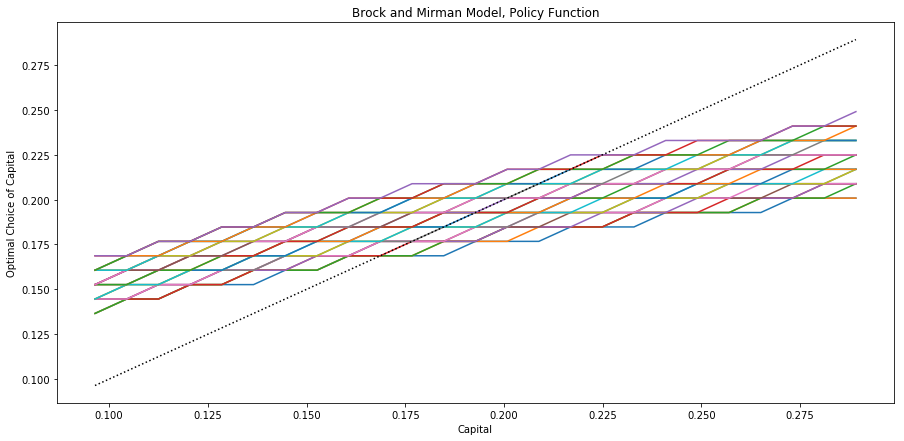

In [71]:
optK = grid[PF]

plt.figure(figsize=(15,7))
for i in range(25):
    plt.plot(grid, optK[:, i])
plt.plot(grid, grid, 'k:')
plt.xlabel('Capital')
plt.ylabel('Optimal Choice of Capital')
plt.title('Brock and Mirman Model, Policy Function')
plt.show()

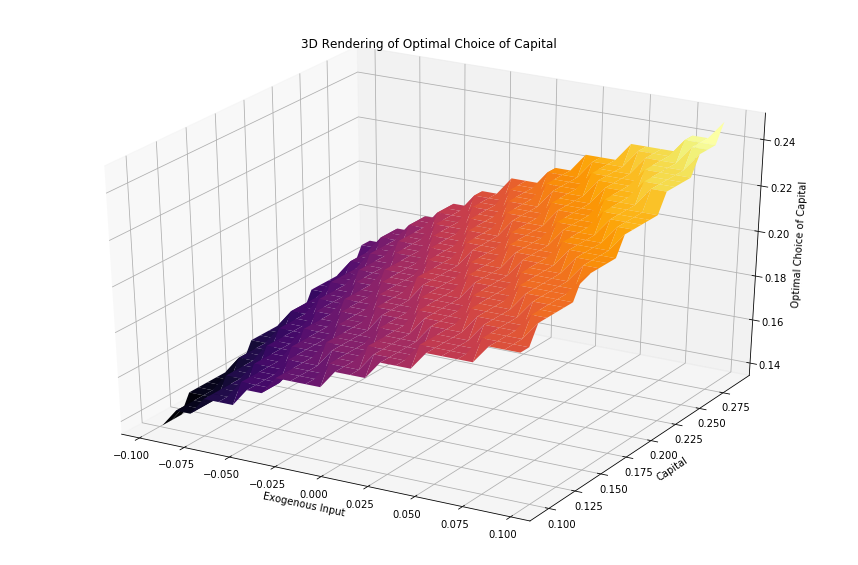

In [68]:
fig = plt.figure(figsize=(15, 10))
Z,K = np.meshgrid(grid, zgrid)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K,Z, optK, rstride=1, cstride=1, cmap=cm.inferno)
ax.set_xlabel('Exogenous Input')
ax.set_ylabel('Capital')
ax.set_zlabel('Optimal Choice of Capital')
ax.set_title('3D Rendering of Optimal Choice of Capital')